In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nz = 516
nz_ghost = 2
nz_full = nz + 2*nz_ghost

R_SUN = 6.957e10
R_START = 0.66
R_END = 0.98

dz = (R_END - R_START)*R_SUN / (nz-1)

r = [R_START*R_SUN + dz*(i-2) for i in range(nz_full)]
r = np.array(r)

(0.95, 0.98)

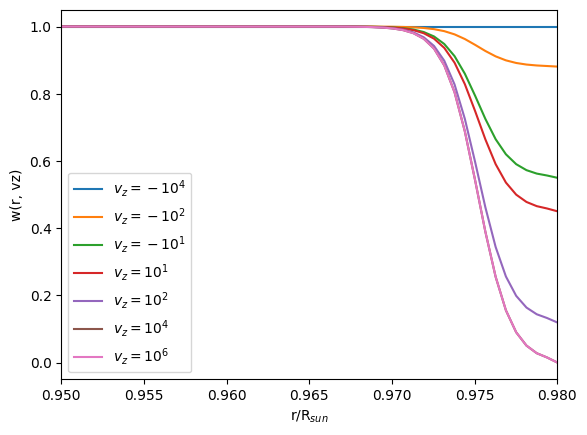

In [50]:
SOFT_WALL_HEIGHT_PERCENTAGE = 0.015
width = 0.002*R_SUN

damped_domain = (R_END - R_START)*R_SUN * SOFT_WALL_HEIGHT_PERCENTAGE

z0_bot = R_START*R_SUN + damped_domain
z0_top = R_END*R_SUN - damped_domain

damping_factor = np.zeros(nz_full)
damping_factor[nz_ghost:nz_full-nz_ghost] = 1.0
damping_factor[nz_ghost] = 0.0
damping_factor[nz_full-nz_ghost-1] = 0.0

damping_bottom = (np.tanh((r - z0_bot) / width) + 1.0) / 2.0
damping_top = (np.tanh((z0_top - r) / width) + 1.0) / 2.0

damping_factor[nz_ghost+1:nz_full-nz_ghost-1] = (damping_bottom * damping_top)[nz_ghost+1:nz_full-nz_ghost-1]


width_vz = 1e2

for vz in [-1e4, -1e2, -1e1, 1e1, 1e2,1e4, 1e6]:
    vz_damp = 0.5 * (np.tanh(vz/width_vz) + 1.0)
    total_damp = vz_damp * (damping_factor - 1.0) + 1.0
    sign = '-' if vz < 0 else ''
    label = r'$v_z=%s10^{%d}$' % (sign, np.abs(np.log10(np.abs(vz))))

    plt.plot(r/R_SUN, total_damp, label=label)



#plt.plot(r/R_SUN, total_damp)
plt.xlabel(r"r/R$_{sun}$")
plt.ylabel("w(r, vz)")
plt.legend()
plt.xlim(0.95, 0.98)

In [17]:
total_damp

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

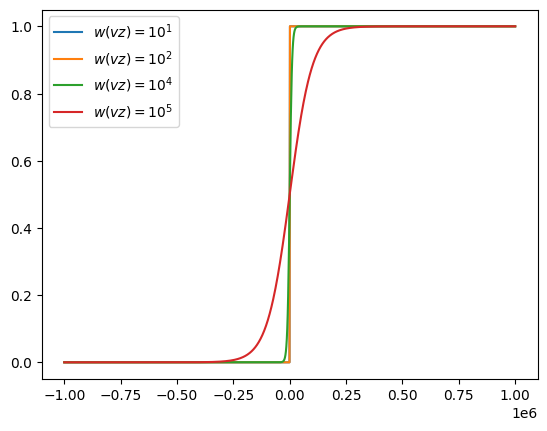

In [63]:
vz = np.linspace(-1e6, 1e6, int(1E3))


for width_vz in [1e1, 1e2, 1e4, 1e5]:
    w = 1/2 * (1 + np.tanh(vz/width_vz))
    label = r"$w(vz)=10^{{{:.0f}}}$".format(np.log10(width_vz))
    plt.plot(vz, w, label=label)

plt.legend()